In [276]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

### Читаем данные


In [331]:
data = pd.read_csv("test_data.csv")
data.head(10)

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11
5,1.555419e+09,view,CPC,0,no_agency,client_265,campaign_13516,ad_13517,android,2019-04-16
6,1.555146e+09,report,CPM,0,no_agency,client_22021,campaign_34637,ad_34651,mvk,2019-04-13
7,1.554503e+09,view,CPM,0,agency_155,client_105617,campaign_106015,ad_106015,iphone,2019-04-05
8,1.554941e+09,view,CPM,0,no_agency,client_264,campaign_13491,ad_13513,android,2019-04-10
9,1.554719e+09,view,CPM,0,no_agency,client_1728,campaign_19254,ad_19255,android,2019-04-08


#### Обнаружилось поле, которе изначально не указано в описании - date
Извлечём дату из поля time, проверим, совпадает ли извлечённая дата с полем date

In [332]:
data['date_from_time'] = pd.to_datetime(data['time'], unit='s').dt.strftime('%Y-%m-%d')
data['time'] = pd.to_datetime(data['time'], unit='s')

print(data.shape)

len(data[data['date'] == data['date_from_time']]['date'])



(122097, 11)


122097

#### Дата везде совпадает, продолжаем
группировка по дате, смотрим группы

In [369]:
actions_by_date = data.groupby(['date']).size()

actions_by_date

date
2019-04-01     5172
2019-04-02     5269
2019-04-03     5357
2019-04-04     5108
2019-04-05     5305
2019-04-06     3955
2019-04-07     4091
2019-04-08     8902
2019-04-09     7963
2019-04-10     7098
2019-04-11    18259
2019-04-12    10740
2019-04-13    10999
2019-04-14     8656
2019-04-15     7457
2019-04-16     7766
dtype: int64

### 1 - Строим график

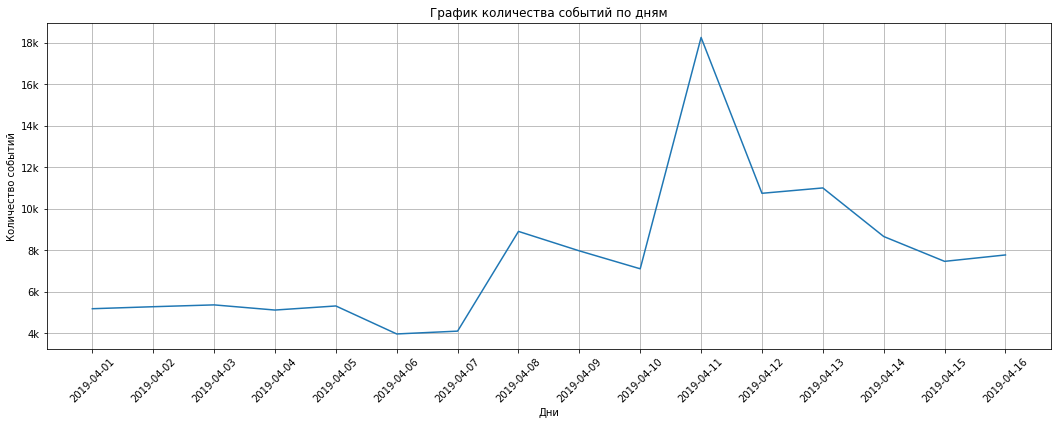

In [334]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

ax.set_title("График количества событий по дням")

plt.xticks(rotation=45)

ticks_y = ticker.FuncFormatter(lambda y,pos: '{0:g}k'.format(y/1000))
ax.yaxis.set_major_formatter(ticks_y)


ax.grid()
ax.plot(actions_by_date)



plt.ylabel('Количество событий')
plt.xlabel('Дни')

plt.show()

#### Отдельно рассмотрим количество событий по типу event (click, view, report)
строим графики

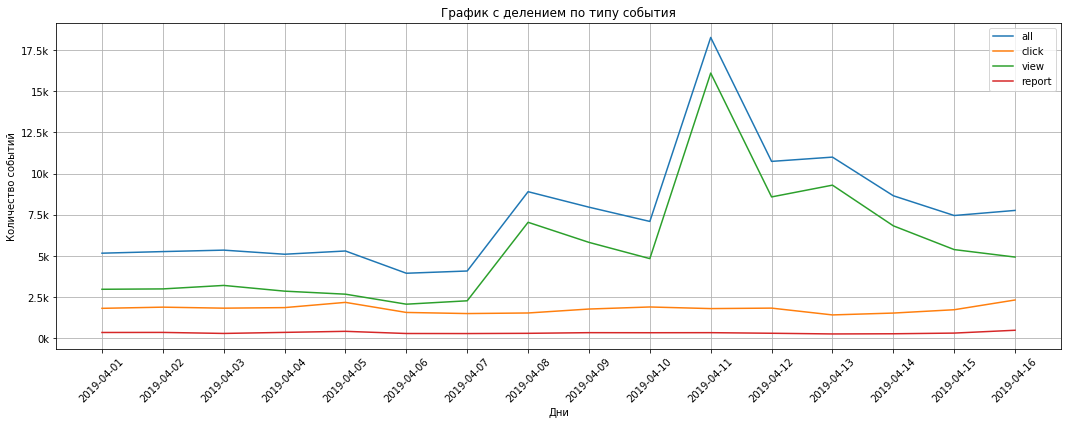

In [266]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

ax.set_title("График с делением по типу события")

plt.xticks(rotation=45)

ticks_y = ticker.FuncFormatter(lambda y,pos: '{0:g}k'.format(y/1000))
ax.yaxis.set_major_formatter(ticks_y)

# собираем события по типам
click_by_date = data.loc[data['event']=='click'].groupby(['date']).size()
view_by_date = data.loc[data['event']=='view'].groupby(['date']).size()
report_by_date = data.loc[data['event']=='report'].groupby(['date']).size()



ax.grid()
ax.plot(actions_by_date, label="all")
ax.plot(click_by_date, label="click")
ax.plot(view_by_date, label="view")
ax.plot(report_by_date, label="report")

ax.legend()

plt.ylabel('Количество событий')
plt.xlabel('Дни')

plt.show()

Очевидно, что скачок произошёл из-за событий "view" - просмотр.

Запомнили это, посмотрим по типу трат (CPC\CPM)

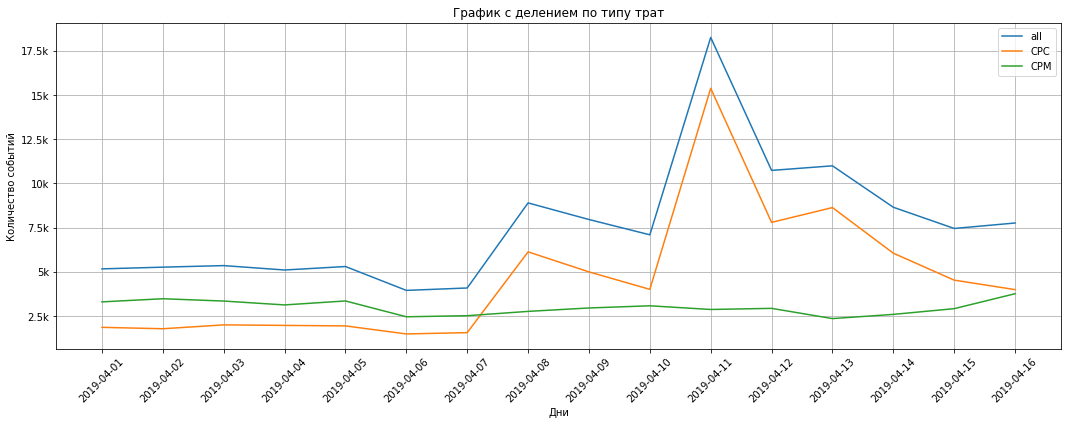

In [261]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

ax.set_title("График с делением по типу трат")

plt.xticks(rotation=45)

ticks_y = ticker.FuncFormatter(lambda y,pos: '{0:g}k'.format(y/1000))
ax.yaxis.set_major_formatter(ticks_y)

# собираем события по типам
cpc = data.loc[data['ad_cost_type']=='CPC'].groupby(['date']).size()
cpm = data.loc[data['ad_cost_type']=='CPM'].groupby(['date']).size()



ax.grid()
ax.plot(actions_by_date, label="all")
ax.plot(cpc, label="CPC")
ax.plot(cpm, label="CPM")

ax.legend()

plt.ylabel('Количество событий')
plt.xlabel('Дни')

plt.show()

Так же очевидно, что всплеск произошёл из-за рекламных объявлений с оплатой за клик CPC.

Посмотрим наличие видео и платформы:

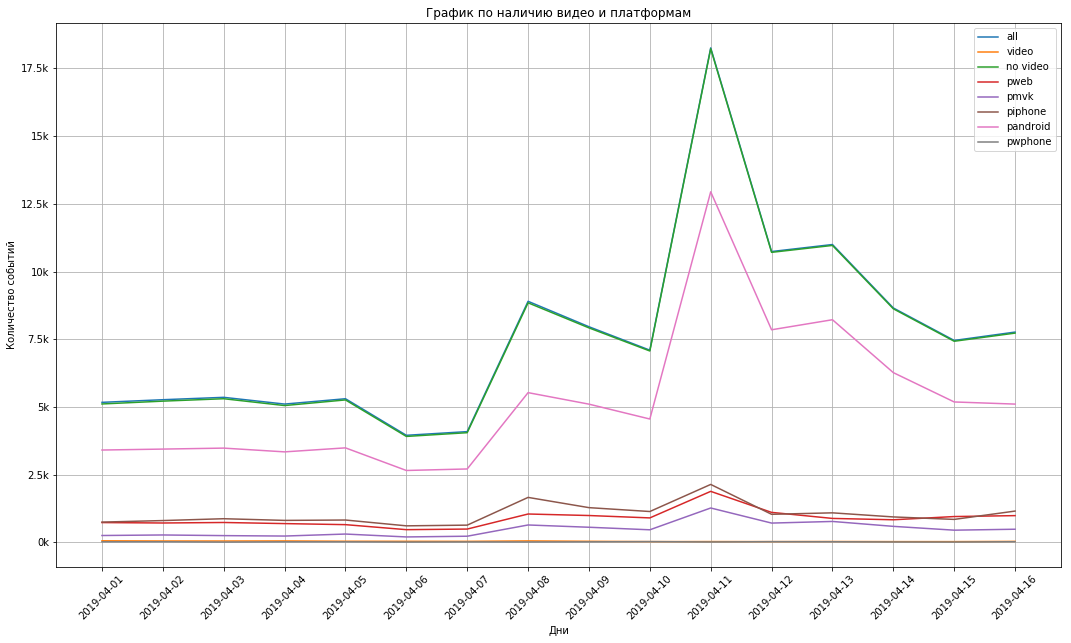

In [267]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)

ax.set_title("График по наличию видео и платформам")

plt.xticks(rotation=45)

ticks_y = ticker.FuncFormatter(lambda y,pos: '{0:g}k'.format(y/1000))
ax.yaxis.set_major_formatter(ticks_y)

# собираем события по типам
video_by_date = data.loc[data['has_video']!=0].groupby(['date']).size()
nvideo_by_date = data.loc[data['has_video']==0].groupby(['date']).size()


pweb = data.loc[data['platform']=='web'].groupby(['date']).size()
pmvk = data.loc[data['platform']=='mvk'].groupby(['date']).size()
piphone = data.loc[data['platform']=='iphone'].groupby(['date']).size()
pandroid = data.loc[data['platform']=='android'].groupby(['date']).size()
pwphone = data.loc[data['platform']=='wphone'].groupby(['date']).size()


ax.grid()
ax.plot(actions_by_date, label="all")


ax.plot(video_by_date, label="video")
ax.plot(nvideo_by_date, label="no video")

ax.plot(pweb, label="pweb")
ax.plot(pmvk, label="pmvk")
ax.plot(piphone, label="piphone")
ax.plot(pandroid, label="pandroid")
ax.plot(pwphone, label="pwphone")

ax.legend()

plt.ylabel('Количество событий')
plt.xlabel('Дни')

plt.show()

Видим, что основные всплески приходятся на объявления без видео и платформу Android

(платформы web, pmk, iphone - тоже всплески, но не такие значительные)

Общую информацию собрали, теперь перейдём к конкретике по самим объявлениям:

agency_union_id — id рекламного агентства (если рекламный кабинет принадлежит физическому лицу, то ячейка будет заполнена значением 'no_agency');

client_union_id — id рекламного клиента;

campaign_union_id — id рекламной кампании;

ad_id — id рекламного объявления; 

Первый пиковый день - 8 апреля, его и рассмотрим.
Сгруппируем события по агентству-клиенту-кампании-объявлению, может быть что-то резко выбивается из общей картины:

In [285]:
first_top8april = data.loc[data['event']=='view']\
.loc[data['ad_cost_type']=='CPC']\
.loc[data['date']=='2019-04-08']\
.groupby(['agency_union_id', 'client_union_id', 'campaign_union_id','ad_id']).size()

first_top8april

agency_union_id  client_union_id  campaign_union_id  ad_id    
agency_10400     client_119932    campaign_119934    ad_119937       1
agency_1046      client_114954    campaign_114954    ad_114954       8
                                                     ad_114959       4
agency_11        client_98413     campaign_98415     ad_98441        5
                                  campaign_98416     ad_98541        1
                                  campaign_98417     ad_98573        2
                                  campaign_98423     ad_98618        2
                                  campaign_98429     ad_98672        1
                                  campaign_98433     ad_98700        2
                                  campaign_98563     ad_98734        1
                 client_98415     campaign_98791     ad_98795        5
                                                     ad_98797        1
                                                     ad_98805        5
              

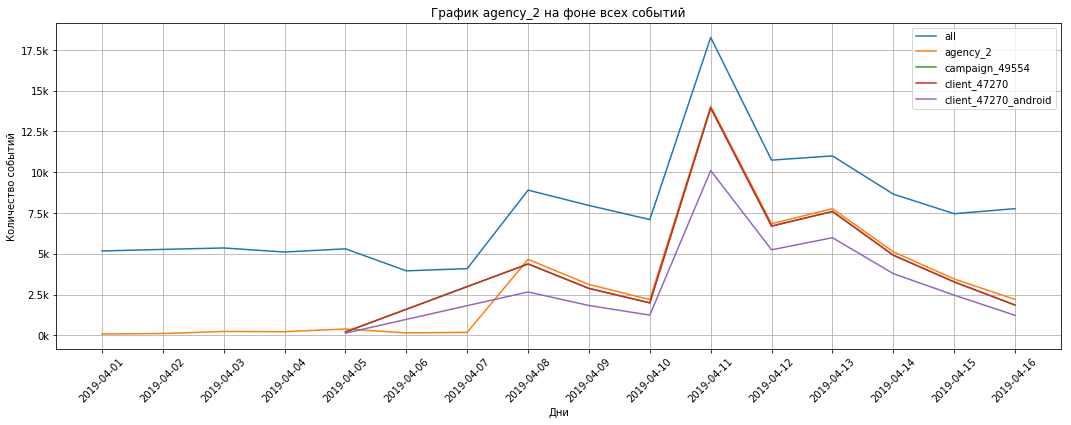

In [293]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

ax.set_title("График agency_2 на фоне всех событий")

plt.xticks(rotation=45)

ticks_y = ticker.FuncFormatter(lambda y,pos: '{0:g}k'.format(y/1000))
ax.yaxis.set_major_formatter(ticks_y)

# выборки
agency_2 = data.loc[data['agency_union_id']=='agency_2'].groupby(['date']).size()

client_47270 = data.loc[data['client_union_id']=='client_47270'].groupby(['date']).size()

campaign_49554 = data.loc[data['campaign_union_id']=='campaign_49554'].groupby(['date']).size()

client_47270_android = data.loc[data['client_union_id']=='client_47270']\
.loc[data['platform']=='android']\
.groupby(['date']).size()



ax.grid()
ax.plot(actions_by_date, label="all")
ax.plot(agency_2, label="agency_2")
ax.plot(campaign_49554, label="campaign_49554")
ax.plot(client_47270, label="client_47270")

ax.plot(client_47270_android, label="client_47270_android")

ax.legend()

plt.ylabel('Количество событий')
plt.xlabel('Дни')

plt.show()

Все пики ярко совпадают, это означет, что мы нашли то, что искали.

Ситуация такова:
клиент client_47270 пользуясь услугами agency_2 создал кампанию campaign_49554, которая создаёт аномальные всплески.

При этом используется рекламная модель CPC, но генерируются события view.

Посмотрим ещё подробности про клиента client_47270:

In [312]:
client_47270 = data.loc[data['client_union_id']=='client_47270']

client_47270.groupby(['event']).count()

# виды событий

,time,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,date_from_time
event,,,,,,,,,,
click,45,45,45,45,45,45,45,45,45,45
report,6,6,6,6,6,6,6,6,6,6
view,47688,47688,47688,47688,47688,47688,47688,47688,47688,47688


In [319]:
client_47270.groupby(['platform']).count()

# платформы

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,date,date_from_time
platform,,,,,,,,,,
android,34685,34685,34685,34685,34685,34685,34685,34685,34685,34685
iphone,4971,4971,4971,4971,4971,4971,4971,4971,4971,4971
mvk,3924,3924,3924,3924,3924,3924,3924,3924,3924,3924
web,4159,4159,4159,4159,4159,4159,4159,4159,4159,4159


In [316]:
client_47270.groupby(['ad_cost_type']).count()

# модели оплаты

,time,event,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,date_from_time
ad_cost_type,,,,,,,,,,
CPC,47739,47739,47739,47739,47739,47739,47739,47739,47739,47739


In [315]:
client_47270.groupby(['has_video']).count()

# видео

,time,event,ad_cost_type,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,date_from_time
has_video,,,,,,,,,,
0,47739,47739,47739,47739,47739,47739,47739,47739,47739,47739


In [322]:
# количество кликов по платформам
client_47270.loc[data['event']=='click'].groupby(['platform']).count()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,date,date_from_time
platform,,,,,,,,,,
android,33,33,33,33,33,33,33,33,33,33
iphone,2,2,2,2,2,2,2,2,2,2
web,10,10,10,10,10,10,10,10,10,10


CTR на различных платформах:

android : 33 / 34685 ~ 1 / 1000
iphone 	2 / 4971 ~ 0.5 / 1000
web 	10 / 4159 ~ 2.5 / 1000

mvk и winphone по 0.

### 2 - Причина и выводы

Клиент client_47270 пользуясь услугами agency_2 создал кампанию campaign_49554, которая создаёт аномальные всплески по просмотрам объявлений, на 47688 просмотров всего 45 кликов.

Видео в объявлениях он не использует, основная целевая платформа - android.

Причины могут быть следующие:

- Рекламное объявление показывается не целевой аудитории. Стандартная причина маленького CTR.
Можно уведомить клиента\агентство об этом.


- Рекламное объявление неправильно отображается (например, находится за пределами маленького экрана или долго подгружается). Тут вопрос к тестировщикам.
Косвенным подтверждением этого может служить тот факт, что конверсия объявления на web-версии в 5 раз больше, чем на iphone и в 2.5 раза больше, чем на android.


- Рекламное объявление таргетируется на служебные аккаунты или ботов. Тут вопросы к клиенты \ агентству.
Косвенное подтверждение этому - значительная доля платформы android, т.е. имеет место таргетинг.

### 3 - Детектор аномальных изменений метрик

Задача поиска аномалий во временных рядах описана в различных источниках.

Реализуем простейшую ситуацию с детекцией выбросов.

Для этого данные разобьём на интервалы, вычислим среднее значение, стандартное отклонение и воспользуемся правилом трех сигм.

3 сигма ~ 99.7 % нормального распределения.

Для тонкой настройки определения выбросов мы можем менять значение 3 сигм на другое.


PS делаю задание в последний момент, сейчас 23-50 26 мая. Готов реализовать более интересные решения


In [427]:
def anomalies_check(data, interval=300, n = 3):
        
    sorted_data = data.sort_values('time').reset_index()
    
    period_groups = sorted_data['time'].groupby(sorted_data['time'].dt.floor(f"{interval}T")).count()
    
    Sigma = period_groups.std()
    mean  = period_groups.mean()

    #print(Sigma, mean)
    
    anomalies = []
    
    for g in period_groups:
        if abs(g - mean) > n * Sigma: # выброс
            anomalies.append(g)
            
    return anomalies
    

interval1day = anomalies_check(data, 600)

interval1day


[11401]